## Diffusion for Brome Mosac Virus

### To account for the right size for the fluctuations, the random force must be uncorrelated Gaussian noise with zero mean and variance
## $\sigma^2 = \frac{2 k_B T\Delta t}{m \gamma}$

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
K = 1.38e-23 # J/K
N = 1000
N_traj = 500
T=300 #K
dt=10e-9 #s
m=7.6e-21 #Kg
gamma=3.4e10
def sigma(T, dt, m, gamma):
    return np.sqrt(2*K*T*dt/(m*gamma))
def msd(traj):   
    return np.average(traj**2, axis=1)

## Random Normal (Gaussian) Brownian Trajectories

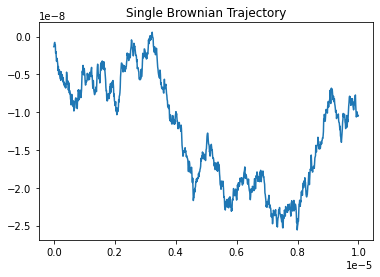

In [50]:
sigma = sigma(T, dt, m, gamma) 
steps = np.random.normal(0, sigma, size=N)
# steps
trajectory = np.cumsum(steps)
# trajectory
plt.plot(dt*np.arange(N), trajectory)
plt.title("Single Brownian Trajectory")
plt.show()

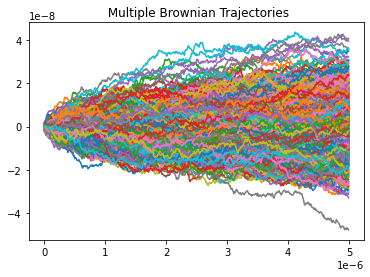

In [51]:
steps = np.random.normal(0, sigma, size=(N_traj, N))
# steps
trajectories = np.cumsum(steps, axis=0)
trajectories.shape
time = dt*np.arange(N_traj)
plt.plot(time, trajectories)
plt.title(" Multiple Brownian Trajectories")
plt.show()


## Mean Square Distance of Trajcetories

Text(0.5, 1.0, 'MSD of Multiple Trajectories')

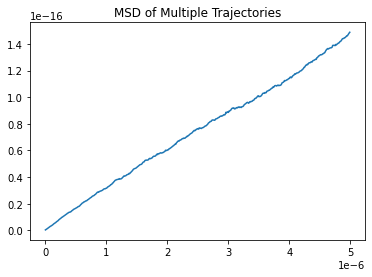

In [52]:
MSD = msd(trajectories)
# len(MSD)
plt.plot(time, MSD)
plt.title("MSD of Multiple Trajectories")

According to the Einstein Diffusion Relation:
$D = k_B T\mu \quad$ where $\mu =\frac{1}{ m\gamma}$ = mobility

MSD is approximately linear with time as, $\lim_{t\rightarrow\infty} \text{MSD}(t) =  2 D t$

Thus, we can plot the theoretical MSD.

In [53]:
mu =1/(m*gamma)
D = K*T*mu
D

1.6021671826625385e-11

## Comparision with The

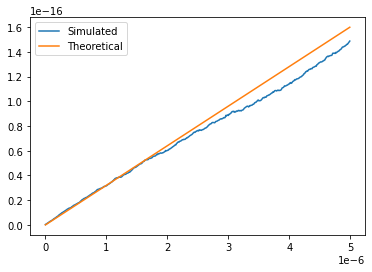

In [54]:
MSD_theory = 2*D*time

plt.plot(time, MSD, label="Simulated")
plt.plot(time, MSD_theory, label="Theoretical")
plt.legend()


# Comparision with theory

Text(0.5, 1.0, 'MSD Fit, Theoretical and Simulated')

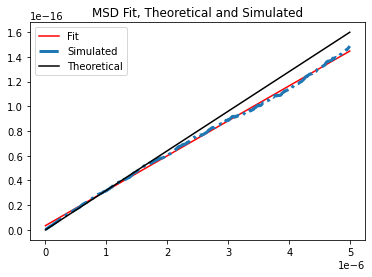

In [63]:

coeff = np.polyfit(time, MSD, deg=1)
p = np.poly1d(coeff)
y = p(time)
plt.plot(time, y, label ="Fit", color="Red")
plt.plot(time, MSD, label = "Simulated", linestyle='-.', linewidth=3)
plt.plot(time, MSD_theory, label="Theoretical", color="black")
plt.legend()
plt.title("MSD Fit, Theoretical and Simulated")